In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
# Load dataset
df = pd.read_csv(r"C:\Users\micro\Downloads\flipkart_dataset.csv")

In [22]:
df

,brand,screen_size_cm,screen_size_inch,resolution,screen_type,price,ratings,no_of_ratings,reviews,launch_year
0,MOTOROLA,80.00,32,HD Ready,QLED,"₹10,999",4.4,5,1,2025
1,Foxsky,109.00,43,Full HD,LED,"₹13,499",4.0,"5,954","1,338",2023
2,SAMSUNG,80.00,32,HD Ready,LED,"₹14,550",4.4,"1,58,255","11,492",2022
3,realme,80.00,32,HD Ready,QLED,"₹10,499",4.3,737,101,2025
4,InnoQ,80.00,32,HD Ready,LED,"₹7,490",4.0,"4,359",496,2024
...,...,...,...,...,...,...,...,...,...,...
403,Thomson,100.00,40,Full HD,LED,"₹12,999",NaN,NaN,NaN,2023
404,IMPEX,80.00,32,HD Ready,LED,"₹15,490",NaN,NaN,NaN,2023
405,Thomson,80.00,32,HD Ready,LED,"₹7,999",NaN,NaN,NaN,2022
406,Acer,80.01,32,HD Ready,LED,"₹10,499",NaN,NaN,NaN,2024


#  Display basic info

In [23]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             408 non-null    object 
 1   screen_size_cm    408 non-null    float64
 2   screen_size_inch  408 non-null    int64  
 3   resolution        408 non-null    object 
 4   screen_type       408 non-null    object 
 5   price             408 non-null    object 
 6   ratings           391 non-null    float64
 7   no_of_ratings     391 non-null    object 
 8   reviews           391 non-null    object 
 9   launch_year       408 non-null    int64  
dtypes: float64(2), int64(2), object(6)
memory usage: 32.0+ KB


In [24]:
df.isnull().sum()

brand                0
screen_size_cm       0
screen_size_inch     0
resolution           0
screen_type          0
price                0
ratings             17
no_of_ratings       17
reviews             17
launch_year          0
dtype: int64

## Data Cleaning

In [25]:
### Price
df["price"]=df["price"].str.replace("₹","")
df["price"]=df["price"].str.replace(",","")
df["price"]=df["price"].astype(int)

In [26]:
### rating
df["ratings"].mode()[0]

4.3

In [27]:

df["ratings"].mean()

4.199999999999999

In [28]:
df["ratings"].median()

4.2

In [29]:
df['ratings'] = pd.to_numeric(df['ratings'], errors='coerce')

In [30]:
df['ratings']=df['ratings'].fillna(value=df['ratings'].median())

In [31]:
### no_of_ratings

In [32]:
df['no_of_ratings'] = pd.to_numeric(df['no_of_ratings'].str.replace(',', ''), errors='coerce')

In [33]:
df["no_of_ratings"]=df["no_of_ratings"].fillna(df["no_of_ratings"].median()).astype("int")

In [34]:
### reviews

In [35]:
df['reviews'] = pd.to_numeric(df['reviews'].str.replace(',', ''), errors='coerce')

In [36]:
df["reviews"]=df["reviews"].fillna(df["reviews"].median()).astype(int)

In [37]:
df

,brand,screen_size_cm,screen_size_inch,resolution,screen_type,price,ratings,no_of_ratings,reviews,launch_year
0,MOTOROLA,80.00,32,HD Ready,QLED,10999,4.4,5,1,2025
1,Foxsky,109.00,43,Full HD,LED,13499,4.0,5954,1338,2023
2,SAMSUNG,80.00,32,HD Ready,LED,14550,4.4,158255,11492,2022
3,realme,80.00,32,HD Ready,QLED,10499,4.3,737,101,2025
4,InnoQ,80.00,32,HD Ready,LED,7490,4.0,4359,496,2024
...,...,...,...,...,...,...,...,...,...,...
403,Thomson,100.00,40,Full HD,LED,12999,4.2,13828,1499,2023
404,IMPEX,80.00,32,HD Ready,LED,15490,4.2,13828,1499,2023
405,Thomson,80.00,32,HD Ready,LED,7999,4.2,13828,1499,2022
406,Acer,80.01,32,HD Ready,LED,10499,4.2,13828,1499,2024


In [38]:
df.shape

(408, 10)

In [39]:
print(df.info()) # Check dataset after cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             408 non-null    object 
 1   screen_size_cm    408 non-null    float64
 2   screen_size_inch  408 non-null    int64  
 3   resolution        408 non-null    object 
 4   screen_type       408 non-null    object 
 5   price             408 non-null    int32  
 6   ratings           408 non-null    float64
 7   no_of_ratings     408 non-null    int32  
 8   reviews           408 non-null    int32  
 9   launch_year       408 non-null    int64  
dtypes: float64(2), int32(3), int64(2), object(3)
memory usage: 27.2+ KB
None


In [40]:
df.to_csv("flipkart_cleaned_tv_data.csv", index=False) # Save cleaned dataset

In [41]:
df.info()  # Check cleaned dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             408 non-null    object 
 1   screen_size_cm    408 non-null    float64
 2   screen_size_inch  408 non-null    int64  
 3   resolution        408 non-null    object 
 4   screen_type       408 non-null    object 
 5   price             408 non-null    int32  
 6   ratings           408 non-null    float64
 7   no_of_ratings     408 non-null    int32  
 8   reviews           408 non-null    int32  
 9   launch_year       408 non-null    int64  
dtypes: float64(2), int32(3), int64(2), object(3)
memory usage: 27.2+ KB


In [42]:
df

,brand,screen_size_cm,screen_size_inch,resolution,screen_type,price,ratings,no_of_ratings,reviews,launch_year
0,MOTOROLA,80.00,32,HD Ready,QLED,10999,4.4,5,1,2025
1,Foxsky,109.00,43,Full HD,LED,13499,4.0,5954,1338,2023
2,SAMSUNG,80.00,32,HD Ready,LED,14550,4.4,158255,11492,2022
3,realme,80.00,32,HD Ready,QLED,10499,4.3,737,101,2025
4,InnoQ,80.00,32,HD Ready,LED,7490,4.0,4359,496,2024
...,...,...,...,...,...,...,...,...,...,...
403,Thomson,100.00,40,Full HD,LED,12999,4.2,13828,1499,2023
404,IMPEX,80.00,32,HD Ready,LED,15490,4.2,13828,1499,2023
405,Thomson,80.00,32,HD Ready,LED,7999,4.2,13828,1499,2022
406,Acer,80.01,32,HD Ready,LED,10499,4.2,13828,1499,2024


<Axes: ylabel='no_of_ratings'>

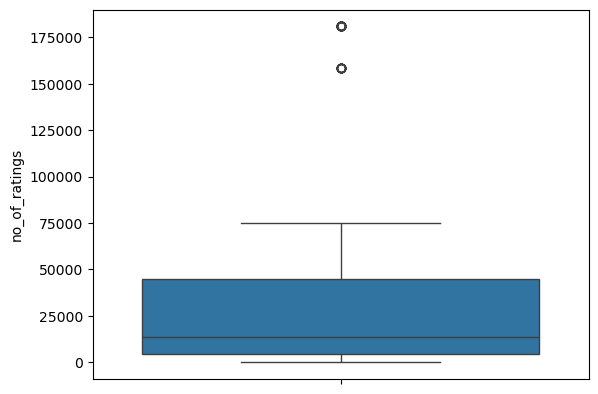

In [43]:
### no_of_ratings	
sns.boxplot(df["no_of_ratings"])

In [44]:
Q1= df['no_of_ratings'].quantile(0.25)  
Q3 = df['no_of_ratings'].quantile(0.75)
IQR = Q3 - Q1

In [45]:
IQR

40728.0

In [46]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [47]:
print(lower_bound) 
print(upper_bound)


-56733.0
106179.0


In [48]:
df = df[(df["no_of_ratings"] >= lower_bound) & (df["no_of_ratings"] <= upper_bound)]

<Axes: ylabel='no_of_ratings'>

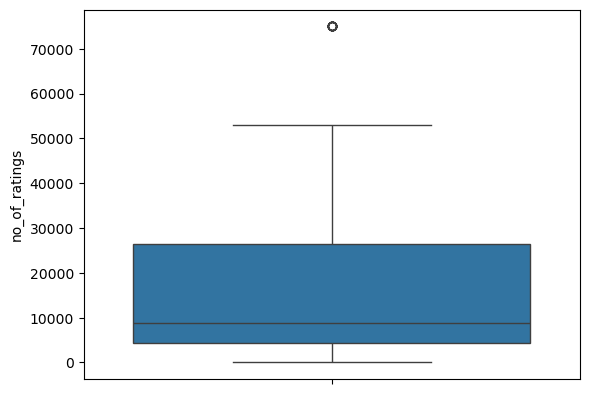

In [49]:
sns.boxplot(df["no_of_ratings"])

In [50]:
Q1= df['no_of_ratings'].quantile(0.25)  
Q3 = df['no_of_ratings'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df["no_of_ratings"] >= lower_bound) & (df["no_of_ratings"] <= upper_bound)]

<Axes: ylabel='no_of_ratings'>

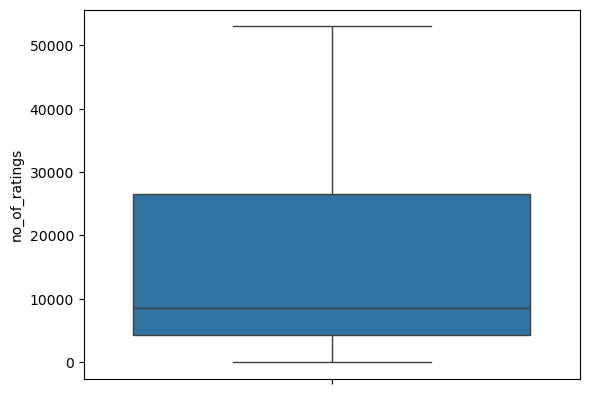

In [51]:
sns.boxplot(df["no_of_ratings"])

<Axes: ylabel='price'>

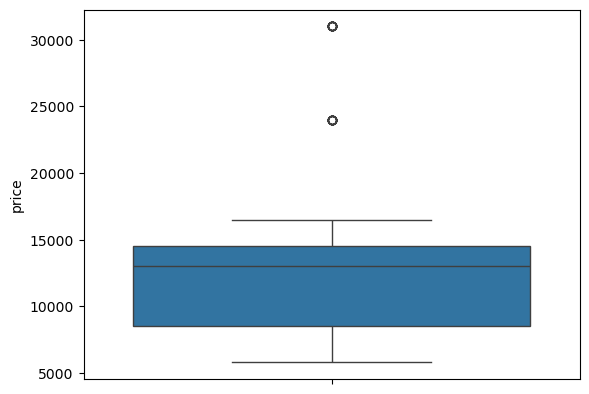

In [52]:
### reviews
sns.boxplot(df["price"])

In [53]:
Q1= df['price'].quantile(0.25)  
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

In [54]:
IQR

6051.0

In [55]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [56]:
print(lower_bound) 
print(upper_bound)

-577.5
23626.5


In [57]:
df = df[(df["price"] >= lower_bound) & (df["price"] <= upper_bound)]

<Axes: ylabel='price'>

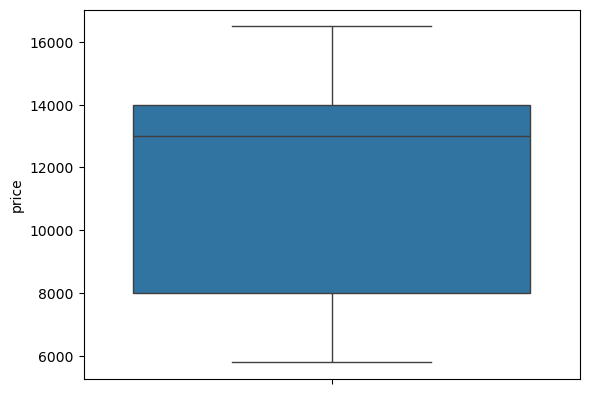

In [58]:
sns.boxplot(df["price"])

In [59]:
df

,brand,screen_size_cm,screen_size_inch,resolution,screen_type,price,ratings,no_of_ratings,reviews,launch_year
0,MOTOROLA,80.00,32,HD Ready,QLED,10999,4.4,5,1,2025
1,Foxsky,109.00,43,Full HD,LED,13499,4.0,5954,1338,2023
3,realme,80.00,32,HD Ready,QLED,10499,4.3,737,101,2025
4,InnoQ,80.00,32,HD Ready,LED,7490,4.0,4359,496,2024
5,InnoQ,80.00,32,HD Ready,LED,6790,4.0,4359,496,2024
...,...,...,...,...,...,...,...,...,...,...
403,Thomson,100.00,40,Full HD,LED,12999,4.2,13828,1499,2023
404,IMPEX,80.00,32,HD Ready,LED,15490,4.2,13828,1499,2023
405,Thomson,80.00,32,HD Ready,LED,7999,4.2,13828,1499,2022
406,Acer,80.01,32,HD Ready,LED,10499,4.2,13828,1499,2024


In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 311 entries, 0 to 407
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   brand             311 non-null    object 
 1   screen_size_cm    311 non-null    float64
 2   screen_size_inch  311 non-null    int64  
 3   resolution        311 non-null    object 
 4   screen_type       311 non-null    object 
 5   price             311 non-null    int32  
 6   ratings           311 non-null    float64
 7   no_of_ratings     311 non-null    int32  
 8   reviews           311 non-null    int32  
 9   launch_year       311 non-null    int64  
dtypes: float64(2), int32(3), int64(2), object(3)
memory usage: 23.1+ KB


In [61]:
df.isnull().sum()

brand               0
screen_size_cm      0
screen_size_inch    0
resolution          0
screen_type         0
price               0
ratings             0
no_of_ratings       0
reviews             0
launch_year         0
dtype: int64

### DATA VISUALIZATION 

### UNIVARIATE 

### What is the market distribution of various tablets brands.

In [69]:
# Count listings per brand
df['brand'].value_counts()


brand
InnoQ        57
Coocaa       28
Acer         28
Thomson      27
TCL          16
LG           16
Panasonic    15
iFFALCON     15
realme       14
Infinix      14
KODAK        14
IMPEX        14
Mi           14
MOTOROLA     13
Foxsky       13
SAMSUNG      13
Name: count, dtype: int64

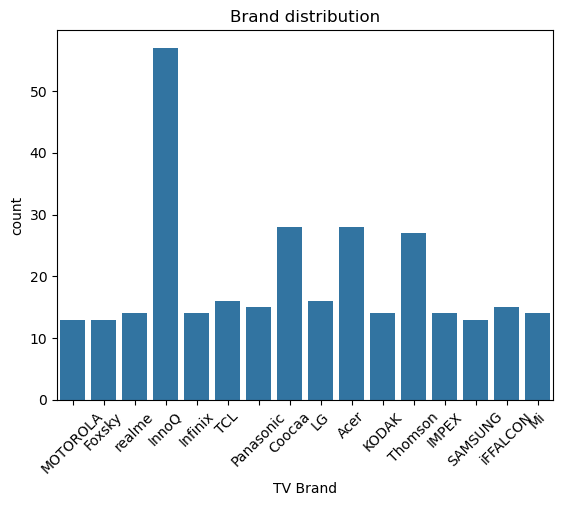

In [70]:
import seaborn as sns
import matplotlib.pyplot as plt



sns.countplot(x="brand",data=df)

plt.xlabel("TV Brand")
plt.ylabel("count")
plt.title("Brand distribution")
plt.xticks(rotation=45)
plt.show()


- This code aims to visually represent the distribution of Television brands in the dataset using a count plot. This type of plot is useful for understanding the frequency or count of each category (brand) in the dataset, providing a quick overview of the brand distribution.

- The top count of brand is Innoq.

### Q2.What is the distribution of tv prices. 

In [96]:
df["price"].value_counts()

price
7999     41
13990    32
15490    29
12999    29
13499    27
10499    27
5790     15
16499    15
9499     15
7490     14
6790     14
12990    14
10999    13
8499     13
14550    13
Name: count, dtype: int64

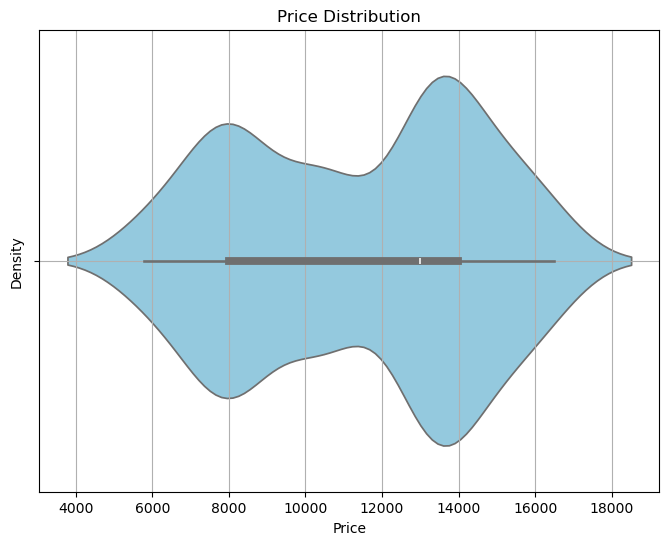

In [93]:
plt.figure(figsize=(8, 6))  
sns.violinplot(x=df["price"], color="skyblue")  

plt.title("Price Distribution")
plt.xlabel("Price")
plt.ylabel("Density")
plt.grid()
plt.show()

- The plot is to provide a visual representation of the distribution of Television prices using a violin plot. Violin plots are useful for showing the distribution of data, including information about central tendency and density. This plot helps to understand the spread of prices and identify potential patterns or clusters in the dataset.


- From this, I have analysed that,the distribution of prices  are more around 14000.

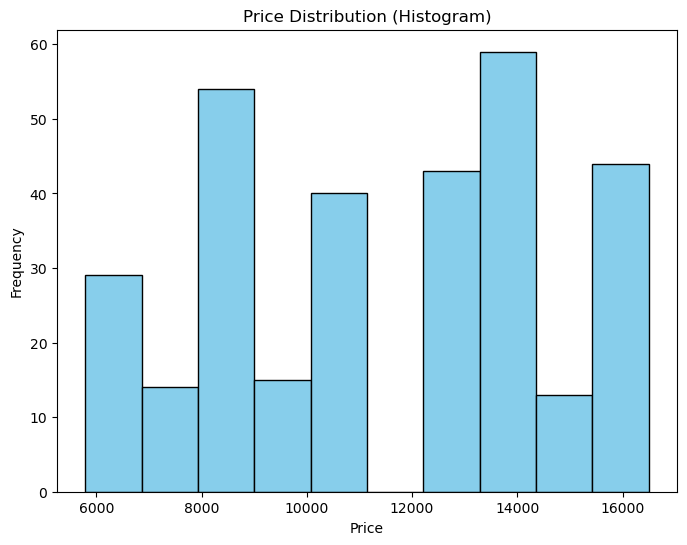

In [95]:
### Histogram
plt.figure(figsize=(8, 6))  # Set the figure size
plt.hist(df["price"], bins=10, color='skyblue', edgecolor='black')  # You can adjust the number of bins

plt.title("Price Distribution (Histogram)")
plt.xlabel("Price")
plt.ylabel("Frequency")
plt.show()

- The code provide a visual representation of the distribution of tablets prices using a histogram. Histograms are effective for displaying the frequency or count of data points within specified bins, allowing for insights into the central tendency and spread of the data.

- From plot,the more prices are around 14000 and there is no tv's at 11000 price.

### Which screen size is most preferred by customers?  

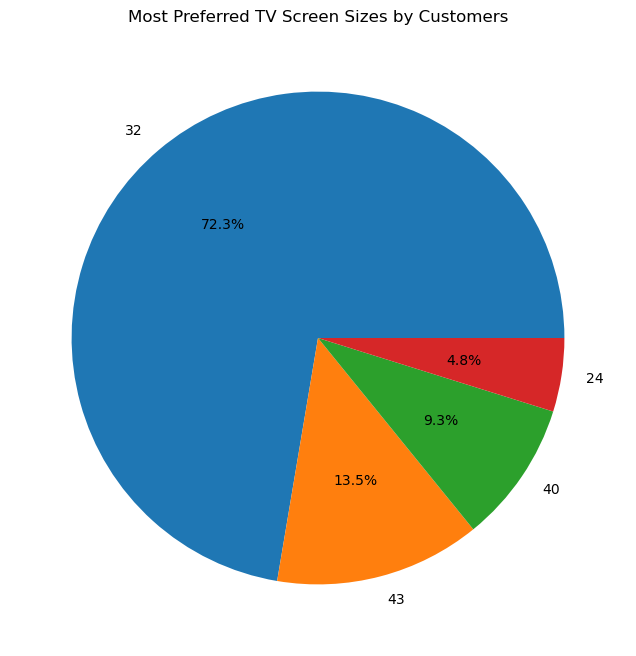

In [99]:
# Screen size distribution
screen_size_counts = df['screen_size_inch'].value_counts()

# Pie Chart
plt.figure(figsize=(8, 8))
plt.pie(screen_size_counts, labels=screen_size_counts.index,autopct='%1.1f%%',  )
plt.title("Most Preferred TV Screen Sizes by Customers")
plt.show()

- from this pie chart the most preferred screen size by the customers is 32 inch

### BIVARIATE 

### Q3.Which tv's brand, based on the resolution, appears to have the highest customer satisfaction?

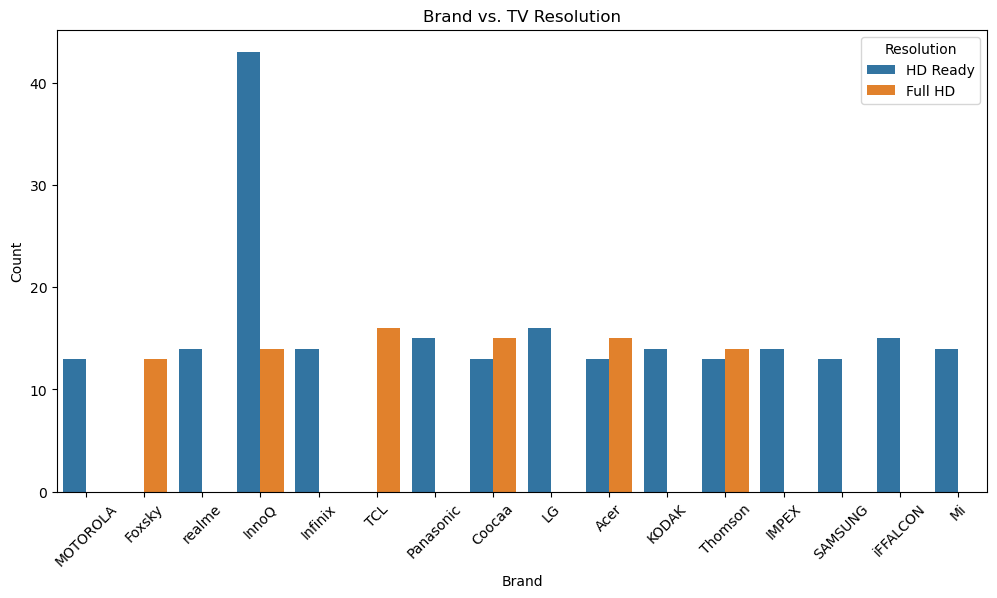

In [73]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='brand', hue='resolution')

plt.xticks(rotation=45)
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Brand vs. TV Resolution")
plt.legend(title="Resolution")
plt.show()


- from this count plot the most preferred tv resolution is "HD Ready" from Innoq brand tv.

### Q6.How does the average price of tv's vary across different brands and resolution?

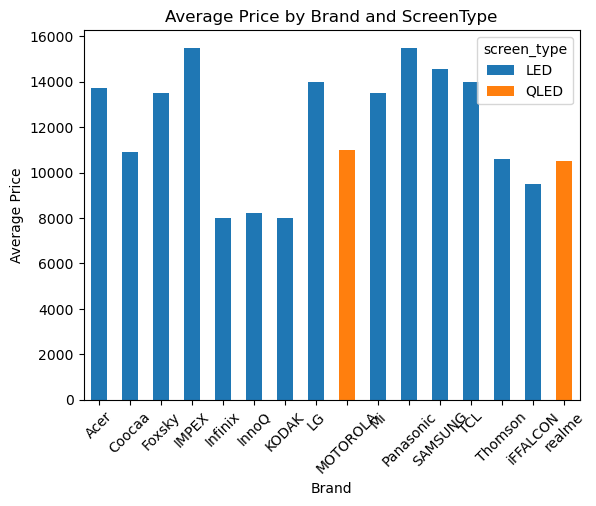

In [76]:
cross_tab = pd.crosstab(index=df['brand'],columns=df['screen_type'], values=df['price'],aggfunc="mean")
cross_tab.plot(kind='bar',stacked=True )
plt.title("Average Price by Brand and ScreenType")
plt.xlabel("Brand")
plt.ylabel("Average Price")
plt.xticks(rotation=45) 
plt.show()


- The plot is used  to visually represent the average prices  by brand and screen type  using a stacked bar plot. This type of plot provides insights into how the average price varies across different combinations of brand and screen type.

- The average prices according to brand and screen type of tv's is "Acer,Foxsky,LG,TCL" of color "blue" around the average prices 13000. 

 ### How does TV price impact customer ratings?  

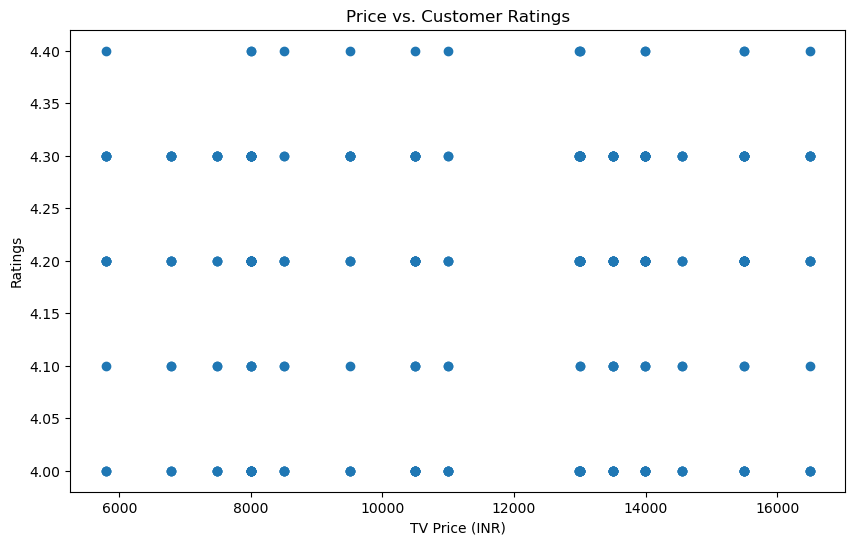

In [100]:
import matplotlib.pyplot as plt

# Scatter Plot
plt.figure(figsize=(10, 6))
plt.scatter(df['price'], df['ratings'],)

# Labels & Title
plt.xlabel("TV Price (INR)")
plt.ylabel("Ratings")
plt.title("Price vs. Customer Ratings")
# plt.grid(True)
plt.show()

- There's no strong correlation between price and ratings. Both low-cost and high-cost TVs have similar ratings, suggesting price doesn't always indicate better quality.

###   How do TV ratings vary by screen size? 

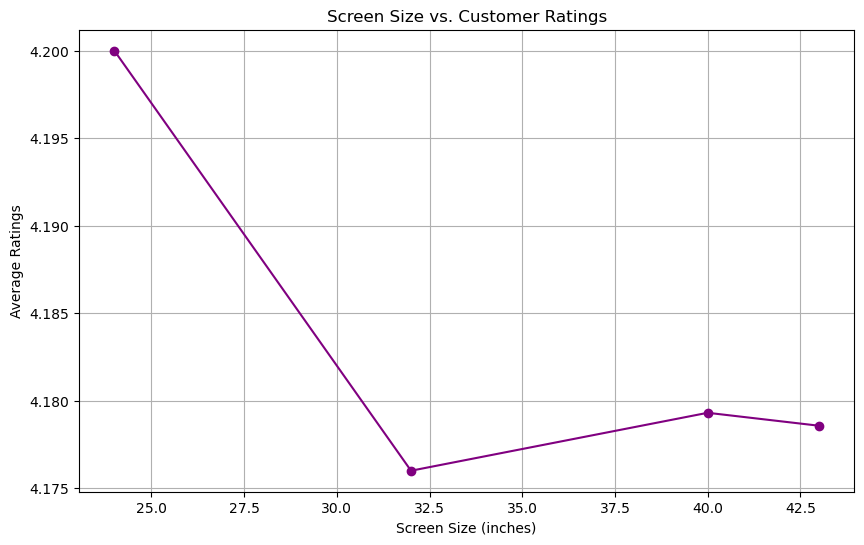

In [122]:
# Average ratings per screen size
size_ratings = df.groupby('screen_size_inch')['ratings'].mean()

# Line Chart
plt.figure(figsize=(10, 6))
plt.plot(size_ratings.index, size_ratings.values, marker='o', linestyle='-', color='purple')

# Labels & Title
plt.xlabel("Screen Size (inches)")
plt.ylabel("Average Ratings")
plt.title("Screen Size vs. Customer Ratings")
plt.grid(True)
plt.show()



- TVs with smaller screen sizes (around 25 inches) have slightly higher average ratings (~4.2).
- As the screen size increases, the ratings decrease slightly but remain fairly consistent, with only marginal variations.
- Larger TVs (40-43 inches) do not necessarily have better ratings, indicating that screen size is not a major factor in customer satisfaction.

-  TV size alone does not significantly impact customer satisfaction.

### Do higher-rated TVs receive more customer reviews? 

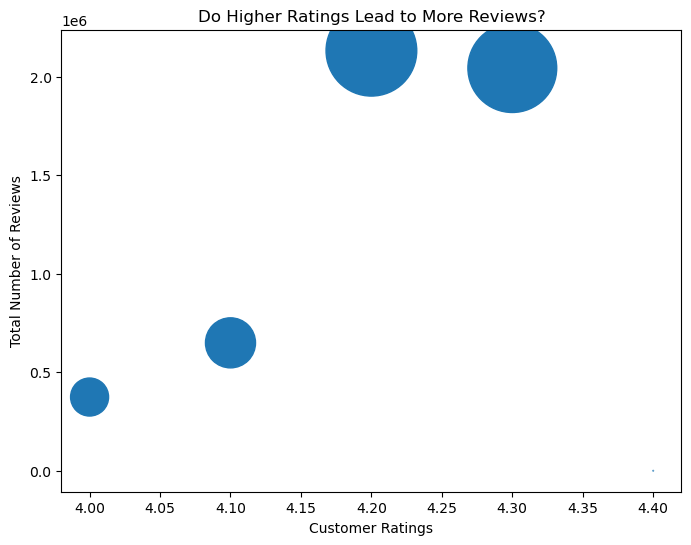

In [111]:


# Aggregate reviews based on ratings
review_data = df.groupby('ratings')['no_of_ratings'].sum().reset_index()

# Bubble Chart
plt.figure(figsize=(8, 6))
plt.scatter(review_data['ratings'], review_data['no_of_ratings'], s=review_data['no_of_ratings'] / 500, )

# Labels & Title
plt.xlabel("Customer Ratings")
plt.ylabel("Total Number of Reviews")
plt.title("Do Higher Ratings Lead to More Reviews?")
plt.show()

### How does screen size impact price?

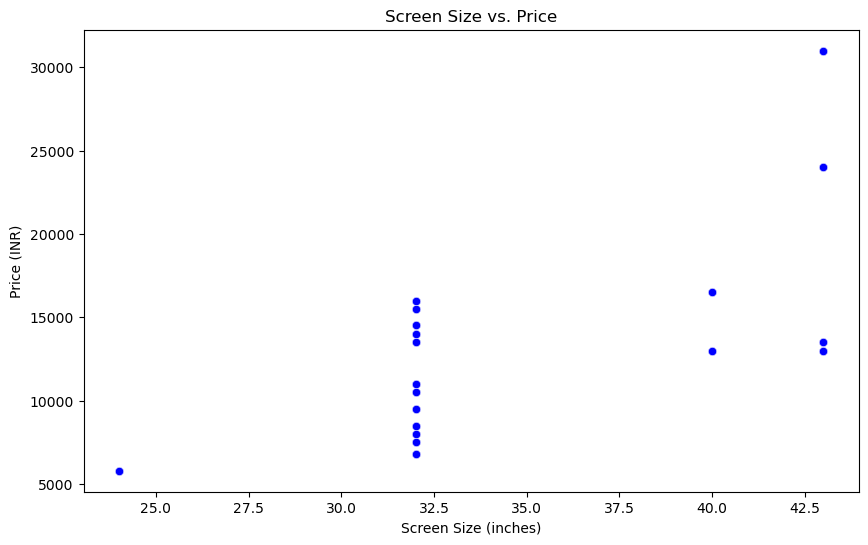

In [161]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='screen_size_inch', y='price', alpha=0.7, color='blue')

plt.xlabel("Screen Size (inches)")
plt.ylabel("Price (INR)")
plt.title("Screen Size vs. Price")
plt.show()


- As expected, larger screen sizes are associated with higher prices, indicating that screen size is a major pricing factor.

### What is the spread of tv's prices according their screen sizes (cm)?

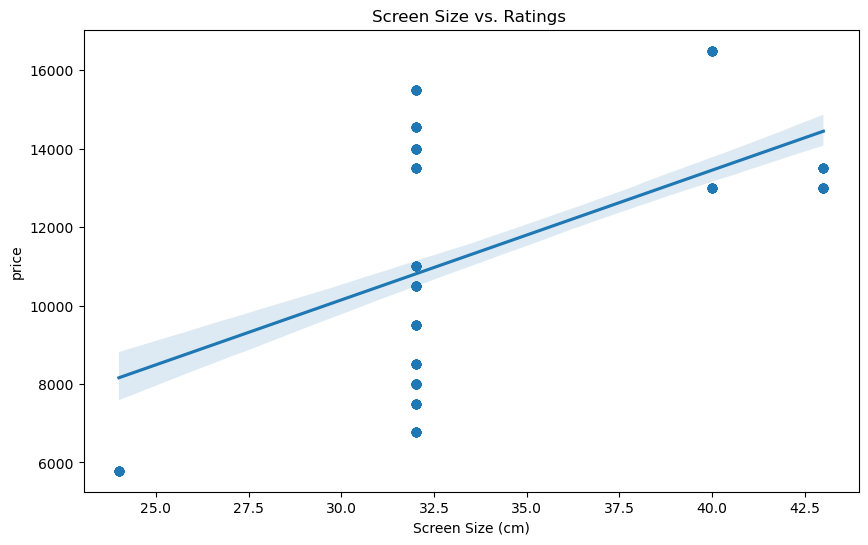

In [74]:
plt.figure(figsize=(10, 6))
sns.regplot(data=df, x='screen_size_inch', y='price')

plt.xlabel("Screen Size (cm)")
plt.ylabel("price")
plt.title("Screen Size vs. Ratings ")
plt.show()


- The plot  visually represent the linear relationship between the 'screen size (cm)' and 'Price' columns using a regression plot. The plot provides insights into how changes in the screen size may be associated with changes in the price of tv's.

- The distribution of screen size are more around 10000.

### Do larger screens have better ratings?

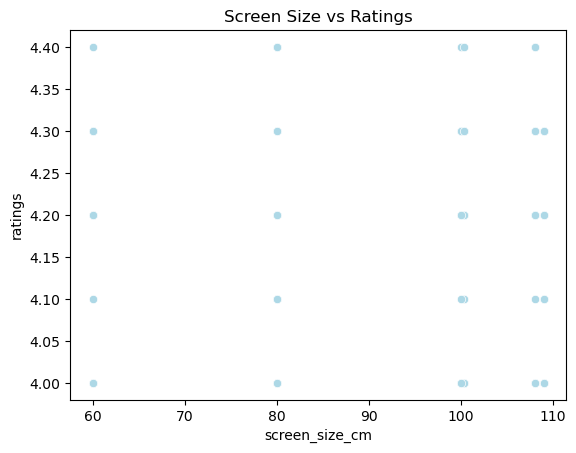

In [80]:
sns.scatterplot(x='screen_size_cm', y='ratings', data=df, color='lightblue')
plt.title('Screen Size vs Ratings')
plt.show()

- There's no clear correlation between screen size and ratings, suggesting that customers' satisfaction is influenced by factors other than screen size.

### MULTIVARIATE  ANALYSIS

###  How do ratings, screen type, and resolution correlate?

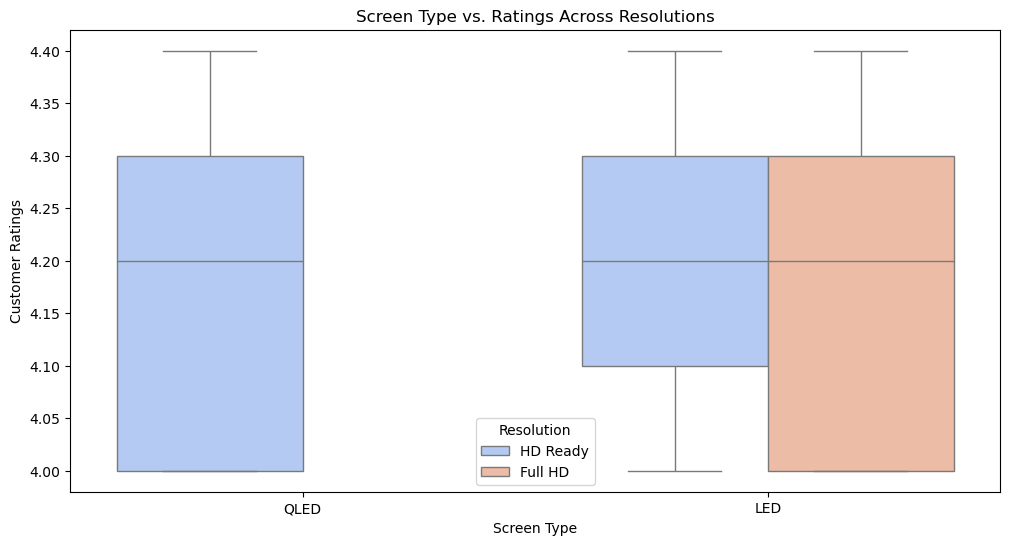

In [112]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='screen_type', y='ratings', hue='resolution', palette='coolwarm')

plt.xlabel("Screen Type")
plt.ylabel("Customer Ratings")
plt.title("Screen Type vs. Ratings Across Resolutions")
plt.legend(title="Resolution")
plt.show()


- QLED TVs have a slightly higher average rating than LED TVs, but the difference is marginal, indicating that screen type has only a minor influence on customer satisfaction.

### How do screen size, ratings, and launch year influence price?

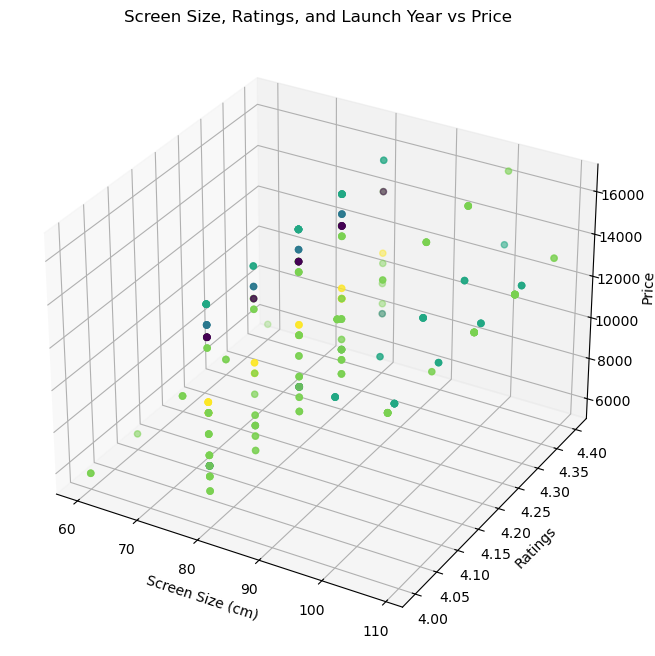

In [117]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['screen_size_cm'], df['ratings'], df['price'], c=df['launch_year'], cmap='viridis')
ax.set_xlabel('Screen Size (cm)')
ax.set_ylabel('Ratings')
ax.set_zlabel('Price')
ax.set_title('Screen Size, Ratings, and Launch Year vs Price')
plt.show()



- TVs with larger screens and higher ratings tend to be priced higher.
- TVs launched in recent years are priced significantly higher, suggesting that newer models are more expensive.

###  What is the relationship between the number of price, ratings, and number of ratings?

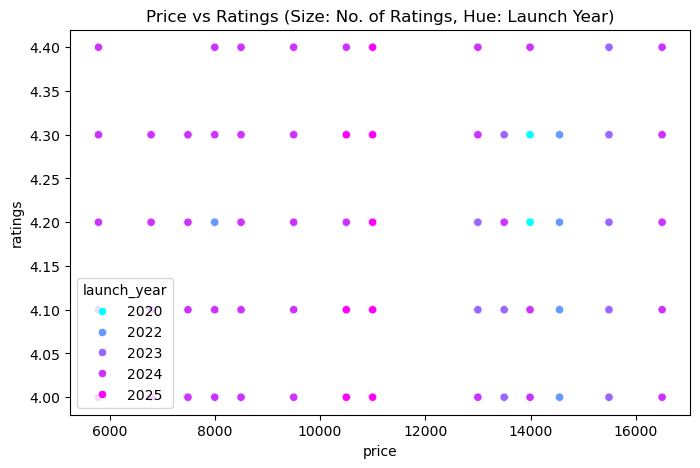

In [116]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='price', y='ratings',  hue='launch_year',
data=df, palette='cool', sizes=(20, 300))
plt.title('Price vs Ratings (Size: No. of Ratings, Hue: Launch Year)')
plt.show()

- TVs launched in recent years (2024-2025) tend to have more ratings, but price variations do not show a clear impact on the number of ratings.


### How do screen size, price, and ratings interact?

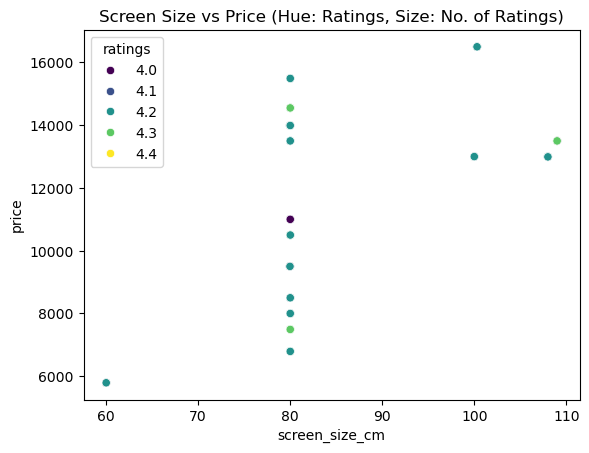

In [115]:
sns.scatterplot(x='screen_size_cm', y='price', hue='ratings', 
                data=df, palette='viridis', sizes=(20, 200))
plt.title('Screen Size vs Price (Hue: Ratings, Size: No. of Ratings)')
plt.show()

- TVs with larger screen sizes tend to have higher prices, but the ratings vary regardless of screen size, indicating that larger screens dont always guarantee better satisfaction.

### What are the correlations among numerical variables?

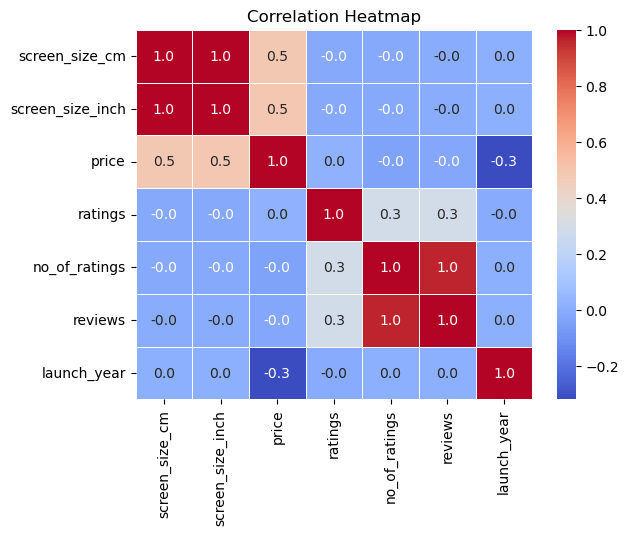

In [92]:
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

- Price and screen size show a moderate positive correlation, confirming that larger TVs are generally more expensive.
- No. of ratings and reviews are highly correlated, suggesting that popular products attract more reviews.
- Ratings show little correlation with price, indicating that expensive products do not guarantee higher ratings.

### Conclusion 

- TVs priced between ₹20,000–₹60,000 are most preferred.

- Mid-sized TVs (32–40 inch) have the highest average ratings.

- Price and screen size are moderately correlated.

- Ratings and reviews go hand-in-hand — popular products get more feedback.